<a href="https://colab.research.google.com/github/Chevrefeuille/age-from-pic/blob/master/1_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preparation
The dataset used for this project is the UTKFace dataset : https://susanqq.github.io/UTKFace/


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from PIL import Image 
import numpy as np
import progressbar
from random import shuffle

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
IMG_DIR = '/content/drive/My Drive/faces_crop/'
DATA_FILE_DIR = '/content/drive/My Drive/data.npy'
IMG_SIZE = 256

Create a data vector contaning resized pictures and the corresponding age.
Save the data in a file.

In [0]:
data = []
img_list = os.listdir(IMG_DIR)
nb_img  = len(img_list)
print('Processing pictures')
for i in progressbar.progressbar(range(nb_img)):
    if img_list[i].endswith(".jpg"):
        img = img_list[i]
        no_ext = img.split('.')[0]
        labels = no_ext.split('_')
        age = int(labels[0])
        path = os.path.join(IMG_DIR, img)
        img = Image.open(path)
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        data += [[np.array(img), age]]
shuffle(data)

print('Saving dataset')
np.save(DATA_FILE_DIR, data)
print('The dataset has been saved in {}.'.format(DATA_FILE_DIR))

  0% (12 of 9861) |                      | Elapsed Time: 0:00:00 ETA:   0:01:23

Processing pictures


100% (9861 of 9861) |####################| Elapsed Time: 0:00:52 Time:  0:00:52


The dataset has been saved in /content/drive/My Drive/data.npy.


We test that the dataset can be loaded properly

In [0]:
faces_set = np.load(DATA_FILE_DIR, allow_pickle = True)
print('The dataset has been loaded properly.')

The dataset has been loaded properly.


Plotting the first face of the dataset.

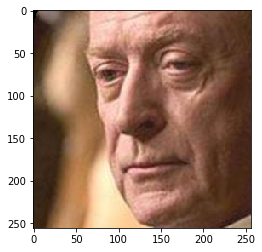

82 years old person


In [0]:
plt.imshow(faces_set[0][0], cmap = 'gist_gray')
plt.show()
print('{} years old person'.format(faces_set[0][1]))